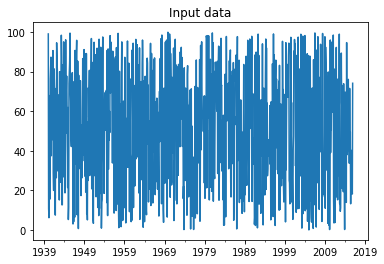

In [2]:
# 8.2 convert data to timeseries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def convert_data_to_timeseries(input_file, column, verbose=False):
    # Load the input file
    data = np.loadtxt(input_file, delimiter=',')

    # Extract the start and end dates
    start_date = str(int(data[0,0])) + '-' + str(int(data[0,1]))
    end_date = str(int(data[-1,0] + 1)) + '-' + str(int(data[-1,1] % 12 + 1))

    if verbose:
        print("\nStart date =", start_date)
        print("End date =", end_date)

    # Create a date sequence with monthly intervals
    dates = pd.date_range(start_date, end_date, freq='M')

    # Convert the data into time series data
    data_timeseries = pd.Series(data[:,column], index=dates)

    if verbose:
        print("\nTime series data:\n", data_timeseries[:10])

    return data_timeseries

if __name__=='__main__':
    # Input file containing data
    input_file = 'data_timeseries.txt'

    # Load input data
    column_num = 2
    data_timeseries = convert_data_to_timeseries(input_file, column_num)

    # Plot the time series data
    data_timeseries.plot()
    plt.title('Input data')

    plt.show()

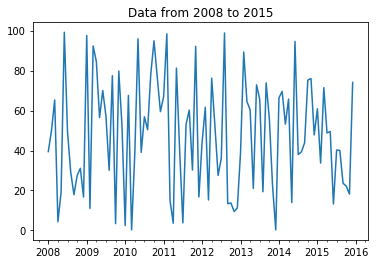

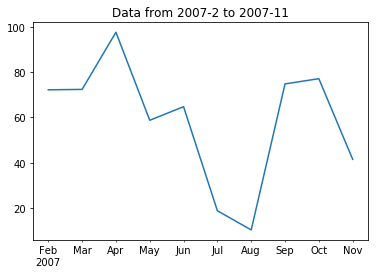

In [4]:
# 8.3 slicing data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from convert_to_timeseries import convert_data_to_timeseries

# Input file containing data
input_file = 'data_timeseries.txt'

# Load data
column_num = 2
data_timeseries = convert_data_to_timeseries(input_file, column_num)

# Plot within a certain year range
start = '2008'
end = '2015'
plt.figure()
data_timeseries[start:end].plot()
plt.title('Data from ' + start + ' to ' + end)

# Plot within a certain range of dates
start = '2007-2'
end = '2007-11'
plt.figure()
data_timeseries[start:end].plot()
plt.title('Data from ' + start + ' to ' + end)

plt.show()

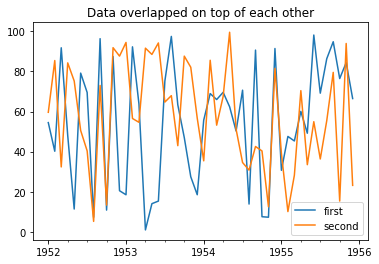

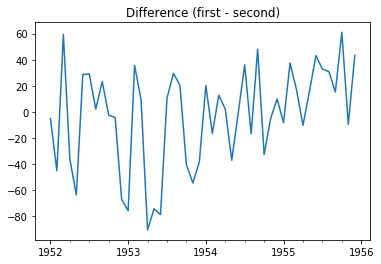

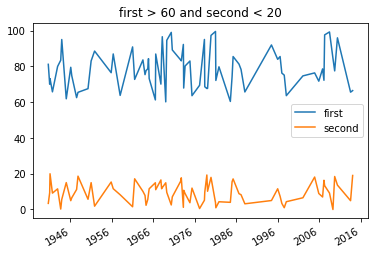

In [5]:
# 8.4 operating on data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from convert_to_timeseries import convert_data_to_timeseries

# Input file containing data
input_file = 'data_timeseries.txt'

# Load data
data1 = convert_data_to_timeseries(input_file, 2)
data2 = convert_data_to_timeseries(input_file, 3)
dataframe = pd.DataFrame({'first': data1, 'second': data2})

# Plot data
dataframe['1952':'1955'].plot()
plt.title('Data overlapped on top of each other')

# Plot the difference
plt.figure()
difference = dataframe['1952':'1955']['first'] - dataframe['1952':'1955']['second']
difference.plot()
plt.title('Difference (first - second)')

# When 'first' is greater than a certain threshold
# and 'second' is smaller than a certain threshold
dataframe[(dataframe['first'] > 60) & (dataframe['second'] < 20)].plot()
plt.title('first > 60 and second < 20')

plt.show()


Maximum:
 first     99.82
second    99.97
dtype: float64

Minimum:
 first     0.07
second    0.00
dtype: float64

Mean:
 first     51.264529
second    49.695417
dtype: float64

Mean row-wise:
 1940-01-31    81.885
1940-02-29    41.135
1940-03-31    10.305
1940-04-30    83.545
1940-05-31    18.395
1940-06-30    16.695
1940-07-31    86.875
1940-08-31    42.255
1940-09-30    55.880
1940-10-31    34.720
Freq: M, dtype: float64

Correlation coefficients:
            first    second
first   1.000000  0.077607
second  0.077607  1.000000


/Users/lijinjin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=24,center=False).mean()
/Users/lijinjin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60).corr(other=<Series>)


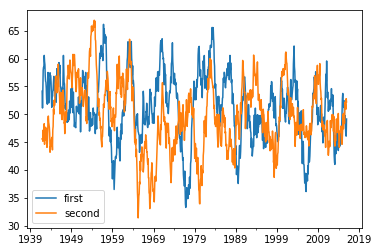

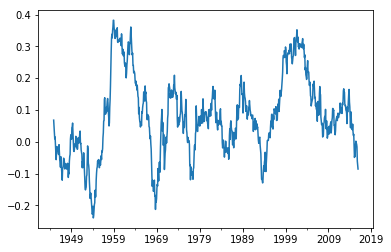

In [6]:
# 8.5 extract stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from convert_to_timeseries import convert_data_to_timeseries

# Input file containing data
input_file = 'data_timeseries.txt'

# Load data
data1 = convert_data_to_timeseries(input_file, 2)
data2 = convert_data_to_timeseries(input_file, 3)
dataframe = pd.DataFrame({'first': data1, 'second': data2})

# Print max and min
print('\nMaximum:\n', dataframe.max())
print('\nMinimum:\n', dataframe.min())

# Print mean
print('\nMean:\n', dataframe.mean())
print('\nMean row-wise:\n', dataframe.mean(1)[:10])

# Plot rolling mean
pd.rolling_mean(dataframe, window=24).plot()

# Print correlation coefficients
print('\nCorrelation coefficients:\n', dataframe.corr())

# Plot rolling correlation
plt.figure()
pd.rolling_corr(dataframe['first'], dataframe['second'], window=60).plot()

plt.show()

In [ ]:
# 8.6 hmm


In [ ]:
# 8.7 crfs


In [ ]:
# 8.8 
